In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.metrics import structure_score
from pgmpy.estimators import TreeSearch

In [2]:
data = pd.read_excel('Data.xlsx')

,crash,time of week,weather,volume,temperature,daytime,season
0,1,1,cloudy,0,0,afternoon,winter


  0%|          | 0/1000000 [00:00<?, ?it/s]

K2: -235771.13693629
BDeu: -235556.35875184508
BDs -235620.0120273296
BIC: -236221.36872208028
['crash', 'daytime', 'season', 'temperature', 'time of week', 'volume', 'weather']
[('crash', 'season'), ('crash', 'daytime'), ('time of week', 'weather'), ('time of week', 'temperature'), ('volume', 'time of week'), ('temperature', 'weather'), ('daytime', 'volume'), ('season', 'temperature'), ('season', 'weather'), ('season', 'volume'), ('season', 'time of week')]


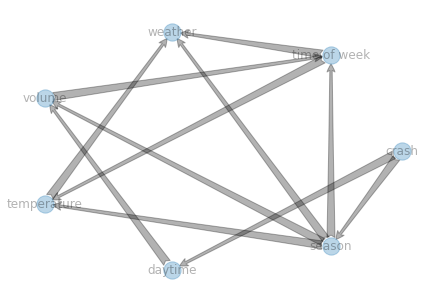

In [3]:
est = HillClimbSearch(data)
model = est.estimate(scoring_method=BicScore(data))
k2 = structure_score(model, data, scoring_method="k2") 
bdeu = structure_score(model, data, scoring_method="bdeu") 
bds  = structure_score(model, data, scoring_method="bds") 
bic = structure_score(model, data, scoring_method="bic")
print("K2:", k2)
print("BDeu:", bdeu)
print("BDs", bds)
print("BIC:", bic)
print(sorted(model.nodes()))
print(model.edges())
nx.draw_circular(model, with_labels=True, arrowsize=20, arrowstyle='fancy',alpha=0.3)
plt.show()

Building tree:   0%|          | 0/21.0 [00:00<?, ?it/s]

K2: -239602.2872421335
BDeu: -239596.56285667908
BDs -239615.2778305542
BIC: -239643.43959740127


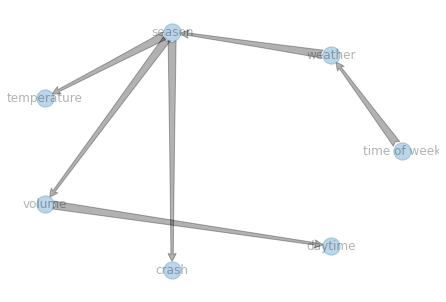

In [4]:
est = TreeSearch(data, root_node='time of week')
model = est.estimate(estimator_type='chow-liu')
k2 = structure_score(model, data, scoring_method="k2") 
bdeu = structure_score(model, data, scoring_method="bdeu") 
bds  = structure_score(model, data, scoring_method="bds") 
bic = structure_score(model, data, scoring_method="bic")
print("K2:", k2)
print("BDeu:", bdeu)
print("BDs", bds)
print("BIC:", bic)
nx.draw_circular(model, with_labels=True, arrowsize=20, arrowstyle='fancy',alpha=0.3)
plt.show()